# Project 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import pandas as pd
from PIL import Image

## Problem 1 The (Discrete) Fourier Transform

candidate: 10015.

### a)
We want to show that $\langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle =
\begin{cases}
  1 & \text{if } k = h \\
  0 & \text{otherwise}
\end{cases}$

First let $k \neq h$:

$\langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle = \int_0^1 e^{2\pi i k x} e^{-2\pi i h x}dx = [\frac{1}{2\pi i (k-h)} e^{2\pi i (k - h) x}]_0^1 = \frac{1}{2\pi i (k-h)} (e^{2\pi i (k - h)} - e^{0}) = 0$

where the last equation comes from the fact that exp() is $2\pi i $-periodic and $k,h \in \mathbb{Z}$. Now for k = h:

$\langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle = \int_0^1 e^0dx = 1$

Hence we have that $\langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle =
\begin{cases}
  1 & \text{if } k = h \\
  0 & \text{otherwise}
\end{cases}$

### b)
We want to show that $\sqrt{2} \sin(2\pi mx), m = 1, 2, \ldots, \cos(2\pi \cdot 0 \cdot x) \text{ and } 2\cos(2\pi nx), \quad n = 1, 2, \ldots, x \in \mathbb{T} $ Form an orthonormal system. 

In the following calculations $n = 1,2, \dots$ and $ m = 0,1,2, \dots$. Firstly: 

$\langle \sqrt{2} sin(2\pi n \cdot),\sqrt{2}cos(2\pi m \cdot)\rangle = \int_0^1 2 sin(2\pi n x)cos(2\pi m x)dx = 0$ 

where the last inequality comes from the fact that $sin(2\pi n x)$ is odd on the interval 0 to 1 and $cos(2\pi n x)$ is even for all possible n,m. Therefore the product is odd, meaning the integral is 0.

$\langle \sqrt{2} sin(2\pi n \cdot),\sqrt{2}sin(2\pi m \cdot)\rangle = \int_0^1 2 sin(2\pi n x)sin(2\pi m x)dx = \int_0^1 cos(2\pi (n-m) x) - cos(2\pi (n+ m) x)dx$ 

Now for $n \neq m$, and using that $sin(2\pi n) = 0$ for $n \in \mathbb{Z}$ we have:

$\langle \sqrt{2} sin(2\pi n \cdot),\sqrt{2}sin(2\pi m \cdot)\rangle = [\frac{1}{2\pi (n-m)}sin(2\pi (n-m) x) - \frac{1}{2\pi (n+m)}sin(2\pi (n+ m) x)]_0^1 = 0 -0-0+0 = 0$

for $n = m$:

$\langle \sqrt{2} sin(2\pi n \cdot),\sqrt{2}sin(2\pi m \cdot)\rangle = \int_0^1 cos(0) - cos(4\pi n x) dx = [x - \frac{1}{4\pi n} sin(4\pi nx)]_0^1 = 1-0 = 1$

$\langle \sqrt{2} cos(2\pi n \cdot),\sqrt{2}cos(2\pi m \cdot)\rangle = \int_0^1 2 cos(2\pi n x)cos(2\pi m x)dx = \int_0^1 cos(2\pi (n-m) x) + cos(2\pi (n+ m) x)dx$ 

For $n \neq m$:

$\langle \sqrt{2} cos(2\pi n \cdot),\sqrt{2}cos(2\pi m \cdot)\rangle  = [\frac{1}{2\pi (n-m)}sin(2\pi (n-m) x) + \frac{1}{2\pi (n+m)}sin(2\pi (n+ m) x)]_0^1 = 0+0+0+0 = 0$

For $n = m \neq 0$:

$\langle \sqrt{2} cos(2\pi n \cdot),\sqrt{2}cos(2\pi m \cdot)\rangle  = \int_0^1 cos(0) + cos(4\pi n x) dx = [x - \frac{1}{4\pi n} sin(4\pi nx)]_0^1 = 1-0 = 1$

For $n=m=0$:

$\langle \sqrt{2} cos(2\pi n \cdot),\sqrt{2}cos(2\pi m \cdot)\rangle  = \int_0^1 cos(0) + cos(0) dx = \int_0^1 2 dx = 2 \implies \langle cos(2\pi 0 \cdot),cos(2\pi 0 \cdot)\rangle = 1$

Hence the described system is orthonormal. 

### c)

{$e^{-2\pi in \cdot}, e^{-2\pi i(n-1) \cdot}\dots , e^{2\pi in \cdot}$} is a base for $\mathcal{T}_n by definition. From a) we know that this set is orthonormal.

{$cos(0), \sqrt{2}cos(2\pi \cdot), \dots, \sqrt{2}cos(2\pi n\cdot), \sqrt{2}sin(2\pi \cdot), \dots, \sqrt{2}sin(2\pi n\cdot)$} is a base for $\mathcal{S}_n$ by definition, and is orthonormal by my calculations from b). 

I.e. They are orthonormal bases. Now using Eulers formula we get:

$c_k e^{2\pi i n x} + c_{-k} e^{-2\pi i n x} = \overline{c_{-k}} e^{2\pi i n x} + c_{-k} e^{-2\pi i n x} = \overline{c_{-k}}(cos(2\pi n x) + i \sin(2\pi n x))+ c_{-k} (cos(2\pi n x) - i \sin(2\pi n x)) = 2Re(c_{-k})cos(2\pi n x) + 2Im(c_{-k}) sin(2\pi n x), \quad Re(c_{-k}),Im(c_{-k}) \in \mathbb{R}$

Meaning every element in $\mathbb{T}_n$ is a linear combination of elements in $\mathbb{S}_n$, and vice versa, since we can do the same computation the other way around. Therefore $\mathbb{T}_n$ and $\mathbb{S}_n$ are the same. We can see that both spaces have 2n+1 basis vectors, i.e. they are of dimension 2n+1. 

### d)
Using the representation: $f(\cdot) = a_0/2 + \sum_{k=1}^n a_kcos(2\pi k \cdot) + b_ksin(2\pi k \cdot)$
 
We have:

$\langle f, cos(2\pi 0 \cdot)\rangle = \langle \frac{a_0}{2} cos(0), cos(0)\rangle = \frac{a_0}{2} \implies a_0 = 2\langle f, cos(2\pi 0 \cdot )\rangle = \int_{-1/2}^{1/2}f(x)cos(2\pi 0 x) dx$

$\langle f, cos(2\pi k \cdot)\rangle = \langle a_k cos(2\pi k \cdot), cos(2\pi k \cdot)\rangle = a_k \langle cos(2\pi k \cdot), cos(2\pi k \cdot)\rangle = \frac{1}{2} a_k \implies a_k = 2 \langle f, cos(2\pi k \cdot)\rangle = \int_{-1/2}^{1/2}f(x)cos(2\pi k x) dx \quad k = 1,\dots,n$

Where the first equality comes from the fact orthogonality shown in b). We also use the fact that the integral from 0 to 1 and -1/2 to 1/2 is the same due to periodicity in the last equality. 

We also have:

$\langle f, sin(2\pi k \cdot)\rangle = \langle b_k sin(2\pi k \cdot), sin(2\pi k \cdot)\rangle = b_k \langle sin(2\pi k \cdot), sin(2\pi k \cdot)\rangle = \frac{1}{2} b_k \implies b_k =  2 \langle f, sin(2\pi k \cdot)\rangle = \int_{-1/2}^{1/2}f(x)sin(2\pi k x) dx\quad k = 1,\dots,n$



### e)

$c_k = \int_0^1f(x)e^{2\pi kx}dx \approx \frac{1}{2} \sum_{j=0}^{N-1} (x_{j+1} - x_{j}) [f_{j}e^{-2\pi ikx_{j}} + f_{j+1}e^{-2\pi ikx_{j+1}}] = \frac{1}{N}(\sum_{j=0}^{N-1}f_je^{-2\pi ikx_j}+\frac{f_0e^0+f_Ne^{-2\pi ik}}{2}) =  \frac{1}{N}\sum_{j=0}^{N-1}f_je^{-2\pi ikj/N}$

The last equality we use periodicity, i.e. $e^{-2\pi i k}=e^0$ and $f_0 = f_N$. Also make note that the $\hat{f_k}$ are N periodic. 

$\hat{f}_{k+N} = 1/N \sum_{j=o}^{N-1}f_je^{-2\pi ij(k+N)/N} = 1/N \sum_{j=o}^{N-1}f_je^{-2\pi ijk/N - 2\pi ij} = 1/N \sum_{j=o}^{n-1}f_je^{-2\pi ijk/N} = \hat{f_k}$
 
Where the second to last inequality comes from $2\pi i$ periodicity of exp().

Since the $\hat{f_k}'s$ are periodic this means that we only have to calculate N discrete coefficients since the rest are just repeating. Using more than N would only add noise and make our approximation worse.
 

### f)
First let $k \mod{N} = 0$ then we know that $k/N = C \in \mathbb{Z}$, using this fact and the $2\pi i$ periodicity of exp():

$1/N \sum_{j=o}^{n-1}e^{-2\pi ijk/N} = 1/N \sum_{j=o}^{n-1}e^{0} = 1$

Now let $k \mod{N} \neq 0:$

$1/N \sum_{j=o}^{n-1}e^{-2\pi ijk/N} = 1/N \sum_{j=o}^{n-1}(e^{-2\pi ik/N})^j = 1/N \frac{1 - e^{-2\pi ik/N \cdot N}}{1-e^{-2\pi ik/N}} = 1/N \frac{1 - e^{0}}{1-e^{-2\pi ik/N}} = 0$

Hence the we get: $1/N \sum_{j=o}^{n-1}e^{-2\pi ijk/N} = \begin{cases}
  1 & \text{if } k \mod{N} = 0 \\
  0 & \text{otherwise}
\end{cases}$

### g)

We start by calculating the matrix product of the RHS of the equation:

$RHS = 1/N \overline{\mathcal{F_n}}diag(\hat{\bf{a}})\mathcal{F_n} = 1/N \overline{\mathcal{F_n}}(\sum_{j=0}^{N-1}a_je^{-2\pi ikj/N}e^{-2\pi ikl/N})_{k,l = 0}^{N-1} = 1/N (\sum_{h=0}^{N-1} e^{2\pi ikh/N} e^{-2\pi ihl/N}\sum_{j=0}^{N-1}a_je^{-2\pi ihj/N})_{k,l = 0}^{N-1}$

Rearrenging and changing order of the sums we get:

$RHS = (\sum_{j=0}^{N-1} a_j 1/N\sum_{h=0}^{N-1}e^{-2\pi ih(k-l-j)/N})_{k,l = 0}^{N-1}$

Using the result from f) and that $k,l,j \in${$0,1,\dots,N-1$} we see that in the outer sum all terms except one goes to zero, in the following calculations j denotes the only non-disappearing term:

$k = l \implies j = 0 \implies a_0 $ on the diagonal

$k > l \implies j = k-l \implies a_{k-l}$ under the diagonal

$k < l \implies j = N-(l-k) = N+k-l \implies a_{N+k-l}$ over the diagonal

This is exactly $circ(\bf{a})$ which is what we wanted to prove. 

The result looks like a diagonalization of $circ(a)$, based on this we make an educated guess that $F_N^{-1}$ is of the form $1/N(\sum_{j=0}^{N-1} e^{2\pi i j y/N})_{k,l = 0}^{N-1}$ for some $y(k,l)$.

We want : $F_NF_N^{-1} = I$

$F_NF_N^{-1} = 1/N(\sum_{j=0}^{N-1} e^{2\pi i j (y-k)/N})_{k,l = 0}^{N-1} = I \implies y=l$

Where the implication comes from the result in f). This mean we have:

$F_N^{-1} = 1/N(\sum_{j=0}^{N-1} e^{2\pi i j l/N})_{k,l = 0}^{N-1}$

### h)

The code below, plots the functions given in the task side by side with their corresponding fourier transform, for N = 5, 17, 257.

In [2]:
def transform(f, N, start = 0.0):
    
    """
    input: 
        f: function to evaluate
        N: number of samples in the interval
        start: start of the samplig interval
    return:
        f(x): ndarray of evaluation of f at uniform sample points in the interval
        fft(x): ndarray, fourier transform of f(x) 
    """
    #Sample from points x_0 to x_(n-1), hence why endpoint = False 
    x = np.linspace(start, start + 1, N, endpoint = False)
    return f(x), fft.fft(f(x))

#Define functions from the task to evaluate

def f_1(x):
    return np.sin(8 * np.pi *x)

def f_2(x):
    return np.sin(32 * np.pi *x) + np.cos(128*np.pi*x)

def f_3(x):
    return x

def f_4(x):
    return 1 - abs(x)


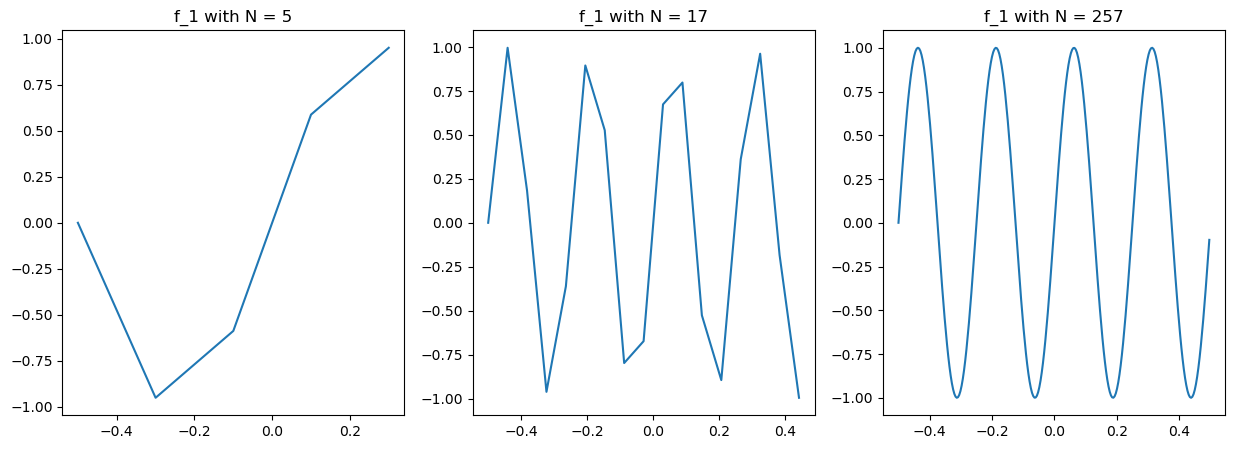

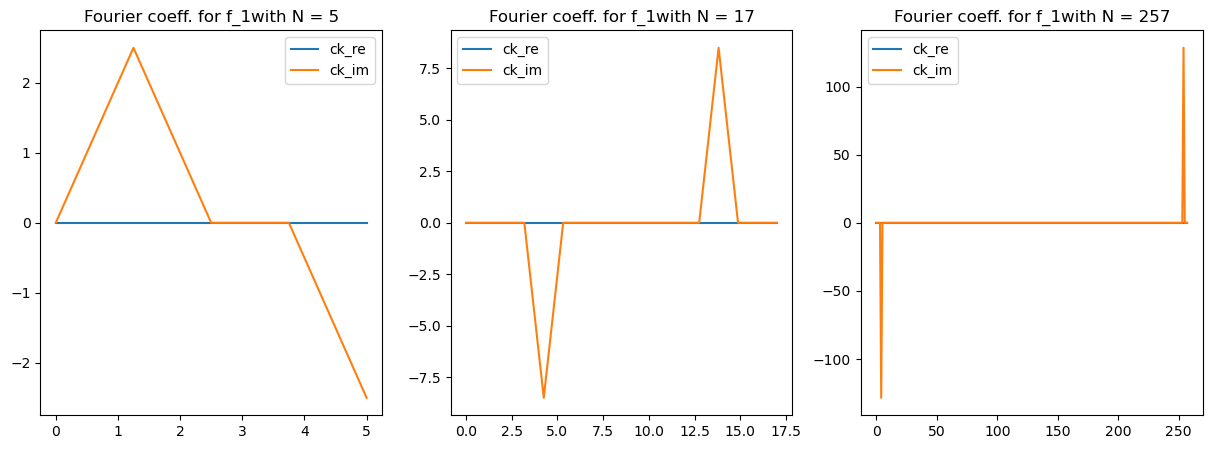

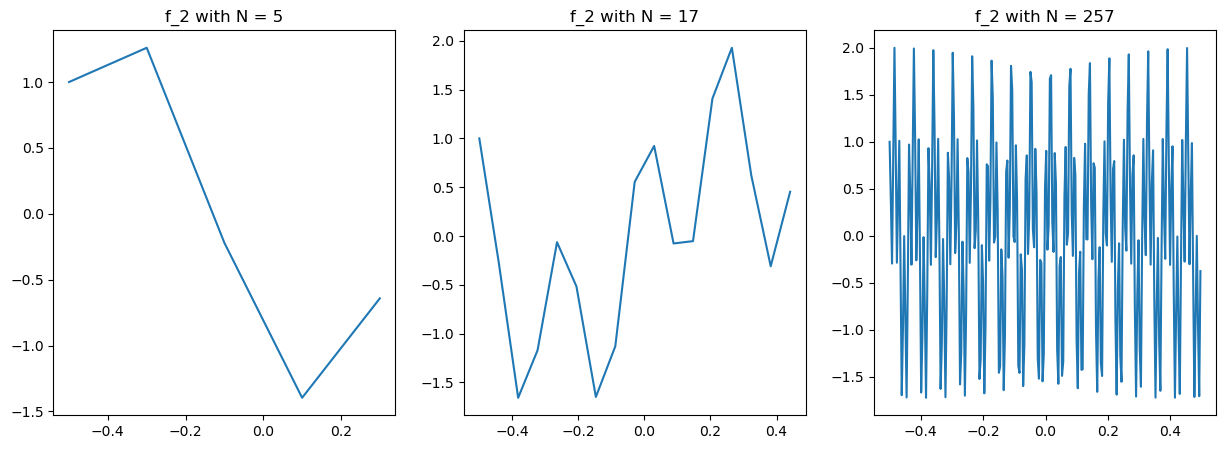

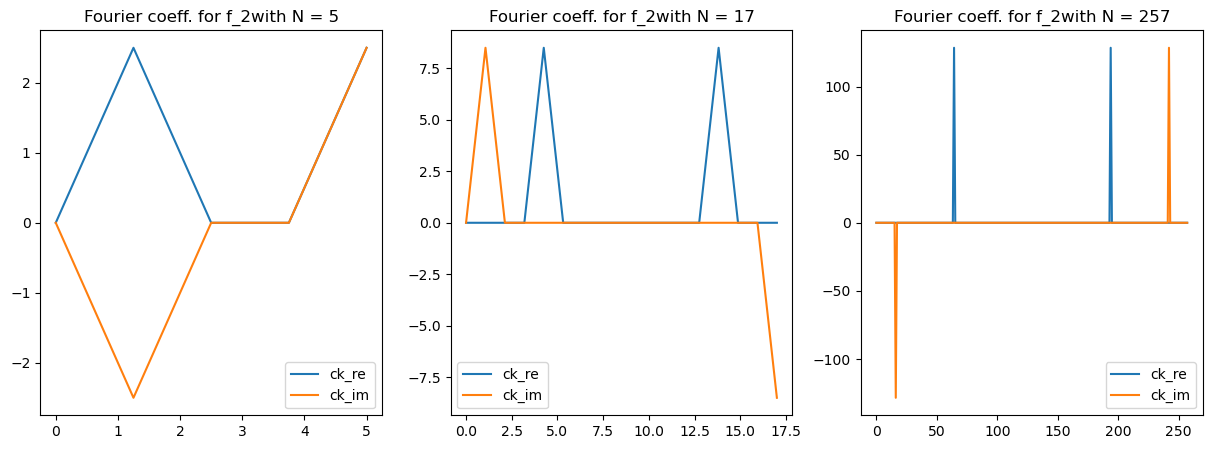

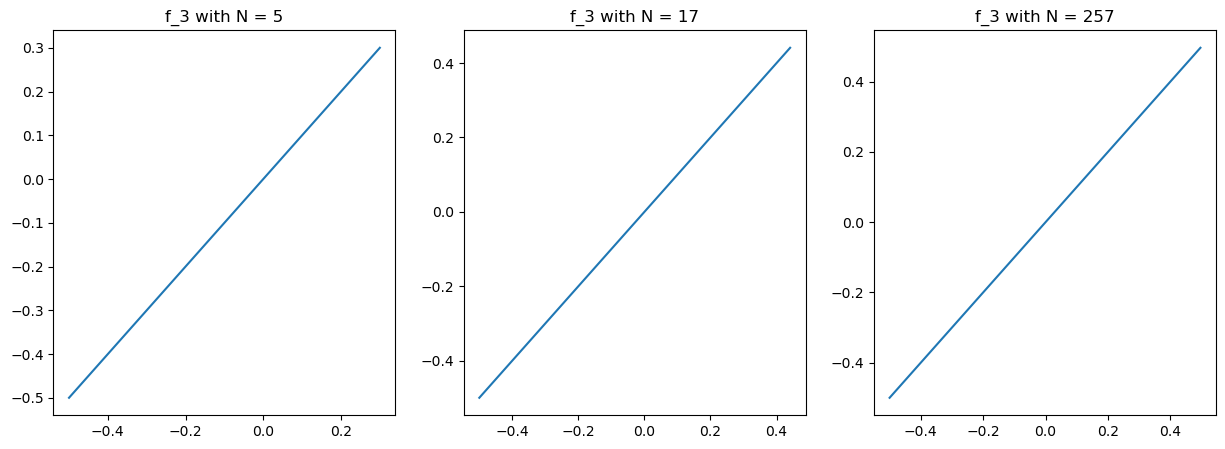

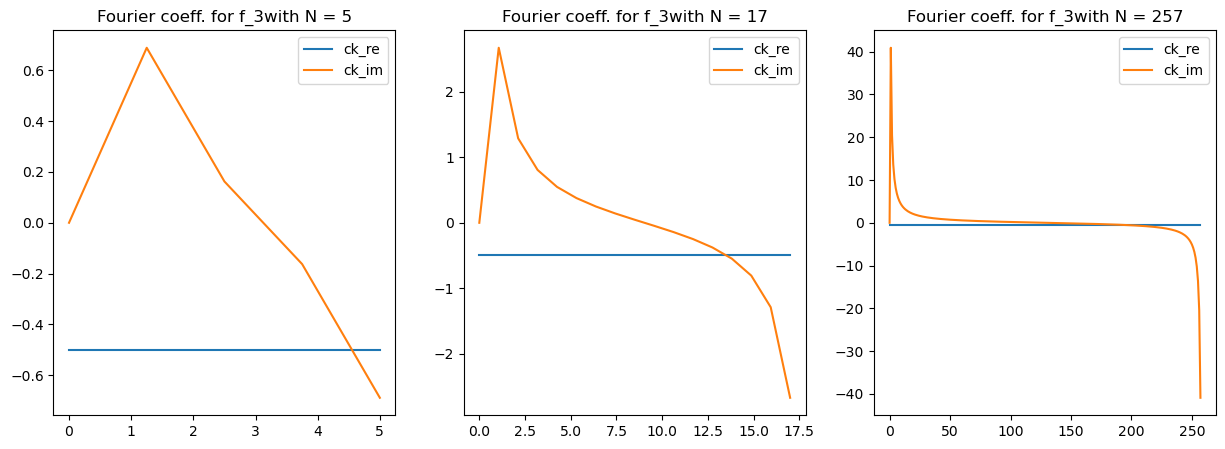

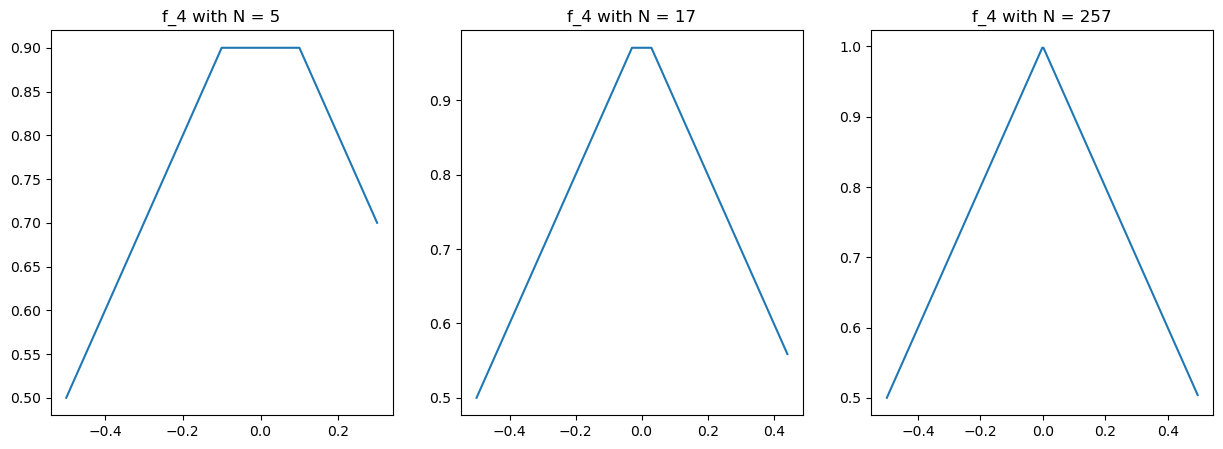

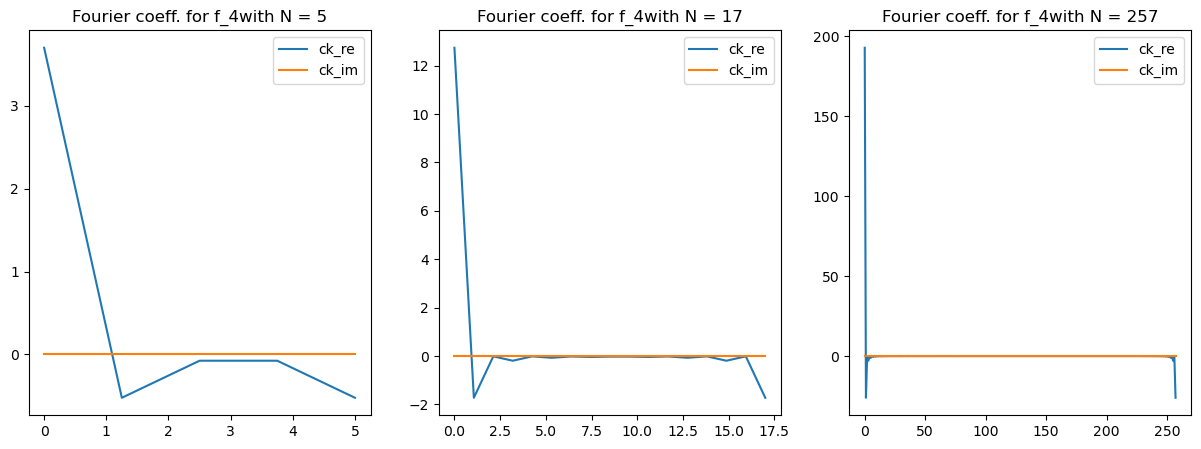

In [3]:
N = [5,17,257]
functions = [f_1, f_2, f_3, f_4]
start = -0.5
titles = [fr"f_1", fr"f_2", fr"f_3", fr"f_4"]

t = 0 #for keeping track of title index
for f in functions:
    
    fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))
    fig2, axs2 = plt.subplots(1, 3, figsize=(15, 5))
    
    for i in range(3): 
        x = np.linspace(start, start+1, N[i], endpoint = False)
        k = np.linspace(0, N[i], N[i])
        
        func, fourier = transform(f, N[i], start)   
        
        axs1[i].plot(x, func, label = "function")
        axs2[i].plot(k, fourier.real, label = r"ck_re")
        axs2[i].plot(k, fourier.imag, label = r"ck_im")
        axs1[i].set_title(titles[t] + fr" with N = " + str(N[i]))
        axs2[i].set_title("Fourier coeff. for " + titles[t] + "with N = " + str(N[i]))
        axs2[i].legend()
    plt.show() 
    t += 1       

We can see that $\bf{f}$ approximates the last two functions best. This is likely due the interval only containing one period. We also see that the second function is approximated the worst, likely due to the high frequency of the function, and therefore would require a lot of sample points to approximate well.   

### i)
Bellow we will plot the discrete fourier coefficients of $f_2$ after applying fftshift for different values of N. 

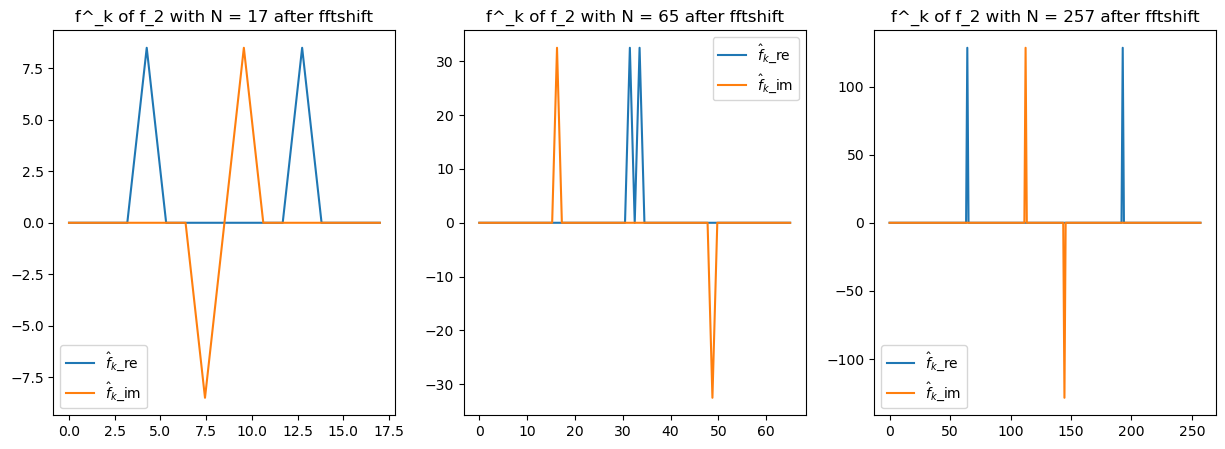

In [4]:
N=[17,65,257]
start = -0.5

fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3): 
    x = np.linspace(start, start+1, N[i], endpoint = False)
    k = np.linspace(0, N[i], N[i])
    
    func, fourier = transform(f_2 ,N[i], start)
    shifted = fft.fftshift(fourier)           
    
    axs1[i].plot(k, shifted.real, label = r"$\hat{f}_k$_re")
    axs1[i].plot(k, shifted.imag, label = r"$\hat{f}_k$_im")
    axs1[i].set_title(fr"f^_k of f_2 with N = {N[i]} after fftshift")        
    axs1[i].legend()
plt.show()   

Recall that $f_2 = sin(32 \pi x) + cos(128\pi x)$ meaning the real fourier coefficients are: $a_k = \begin{cases}
  1 & \text{if } k = 64 \\
  0 & \text{otherwise}
\end{cases}$ and $b_k = \begin{cases}
  1 & \text{if } k = 16 \\
  0 & \text{otherwise}
\end{cases}$

Using this and that $2 Re(C_k) = a_k, 2 Im(C_k) = b_k$, and $c_{-k} = \overline{c_k}$ one see that $c_k = \begin{cases}
  1/2 & \text{if } k = 64 \\
  -i/2 & \text{if } k = 16 \\
  0 & \text{otherwise}
\end{cases}$ ¨

fft.fft returns the fourier coefficients with the zero index first, then the positive indexes, and all the negative indexes last. The ffshift function shifts the zero index, i.e. the zero-frequency, to the center of the interval, with the negative indexes to the left and positive to the right, increasing in value away from the center. In the code block bellow we will try to "remove" the second summand in by setting $\hat{f}_{^+_-64}$ to 0, i.e. removing the 64 frequency. 

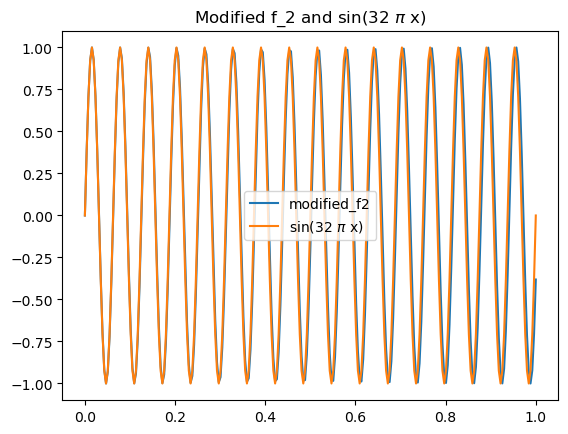

In [5]:
N = 257
x = np.linspace(0, 1, N)

func, fourier = transform(f_2 , 257, start)
shifted = fft.fftshift(fourier)     #shifts c_0 to the middle of the interval
#remove c_64 and c_-64, corresponding to the cos in f_2 
shifted[N//2 + 64] = 0     
shifted[N//2 - 64] = 0
#shift back to original transform
shifted = fft.ifftshift(shifted)
#take inverse tranfsorm to obtain the modified version of f_2
modified_f_2 = fft.ifft(shifted)

#Plot the modified f_2 against the sin() from f_2
plt.plot(x, modified_f_2.real, label=r"modified_f2" )
plt.plot(x, np.sin(32*np.pi*x), label=r"sin(32 $\pi$ x)")
plt.title(r"Modified f_2 and sin(32 $\pi$ x)")
plt.legend()
plt.show()

As expected if we set $\hat{f}_{^+_-64}$ to zero and do the inverse FFT, the modified function mathces up with sin($32 \pi x$) which is the first summand of $f_2$. If we were to use N=17 we could not do this as we would not do this as we would have too few $\hat{f}_k$'s. As we can see from the plot of $f_2$'s discrete coefficients with N=17 above the coefficients corresponding to the cos() part, i.e. the real valued $c_k$ are approximated by mutiple $\hat{f_k}'s$ so we can not just remove one. 


## 2 Signal Processing

### a)

Using $\bf{c'}$ instead of $\bf{c}$ we get:

$(\textbf{c'})_j = (\textbf{a*b'})j = \sum_{k=0}^{N-1}a_kb'_{j-k \mod{N}} = \sum_{k=0}^{N-1}a_kb_{j-1-k \mod{N}} = (\textbf{c})_{j-1}$

or 

$\textbf{c'} = (\sum_{k=0}^{N-1}a_kb_{j-1-k \mod{N}})_{j=0}^{N-1}$ 

### b)
First we have:

$c_k(f*g) = \lang f*g, e^{2\pi i \cdot} \rang = \int_{\mathbb{T}} \int_{\mathbb{T}} f(y)g(x-y)dy \space e^{-2\pi ik x} dx = \int_{\mathbb{T}} f(y) \int_{\mathbb{T}}g(x-y)  e^{-2\pi ik x}dx \space dy = \int_{\mathbb{T}} f(y) \int_{\mathbb{T}}g(t)  e^{-2\pi ik (y+t)}dx \space dy = \int_{\mathbb{T}} f(y) e^{-2\pi i ky}\int_{\mathbb{T}}g(t)  e^{-2\pi i kt}dt \space dy = \int_{\mathbb{T}} f(y) e^{-2\pi i ky} dy \int_{\mathbb{T}}g(t)  e^{-2\pi i kt}dt = c_k(f) c_k(g) \quad \square$

Here we use Fubini to change the order of integration, and then use a substitution t=x-y to make the inner integral independent of y. 

Next we have: 

$ \hat{\textbf{a}} \circ \hat{\textbf{b}} = ((\sum_{k=0}^{N-1} e^{-2\pi ijk} a_k) (\sum_{h=0}^{N-1} e^{-2\pi ijh} b_h ))_{j=0}^{N-1}$

$\hat{(\textbf{a} * \textbf{b})}= (\sum_{h=0}^{N-1} e^{-2\pi i j h/N}( \textbf{a*b} )_h)_{j=0}^{N-1} = (\sum_{h=0}^{N-1} e^{-2\pi i j h/N} \sum_{k=0}^{N-1} a_kb_{h-k \mod{N}})_{j=0}^{N-1} = (\sum_{k=0}^{N-1} a_k \sum_{h=0}^{N-1} e^{-2\pi i j h/N} b_{h-k \mod{N}} )_{j=0}^{N-1} = (\sum_{k=0}^{N-1} e^{-2\pi i j k/N} a_k \sum_{h=0}^{N-1} e^{-2\pi i j (h-k)/N} b_{h-k \mod{N}} )_{j=0}^{N-1} = ((\sum_{k=0}^{N-1} e^{-2\pi i j k/N} a_k )(\sum_{h=0}^{N-1} e^{-2\pi i j h/N} b_{h} ))_{j=0}^{N-1}$

i.e. $\hat{\textbf{a}} \circ \hat{\textbf{b}} = \hat{(\textbf{a} * \textbf{b})} \quad \square$

The last inequality holds since $e^{2\pi ij(h-k)/N} = e^{2\pi ij(h-k \mod{N})/N}$ due to periodicity. 

This can help us simplify the calculations of $circ(\hat{\textbf{a}})circ(\hat{\textbf{b}})$:

$circ(\hat{\textbf{a}})circ(\hat{\textbf{b}}) 
= 1/N^2\overline{\mathcal{F}_n}diag(\hat{\textbf{a}})\mathcal{F}_n\overline{\mathcal{F}_n}diag(\hat{\textbf{b}})\mathcal{F}_n 
=1/N\overline{\mathcal{F}_n}diag(\hat{\textbf{a}})\text{diag}(\hat{\textbf{b}})\mathcal{F}_n
=1/N\overline{\mathcal{F}_n}diag(\hat{\textbf{a}}\circ\hat{\textbf{b}})\mathcal{F}_n
=1/N\overline{\mathcal{F}_n}diag(\widehat{\textbf{a} * \textbf{b}})\mathcal{F}_n  = circ(\textbf{a} * \textbf{b})$

### c) 
We can directly find the $a_k$'s and $b_k$'s from the definition of $D_n$: $a_k =\begin{cases}
  1 & \text{if } k = 0 \\
  2 & \text{if } 0 < k < n+1 \\
  0 & \text{otherwise}
\end{cases} $ and $b_k = 0$ for all k. This implies $c_k = c_{-k} = \begin{cases}
  1 & \text{if } k = 0, 1 ... n \\
  0 & \text{otherwise}
\end{cases} $ 

From this we see that if you convolve a $D_n$ with a function f all the coefficients above index n becomes zero while the rest remain the same. This means we want to use this filter when we want to remove all coefficients larger than a certain order. It is easier to define the filter directly in the frequency domain as, then it is simply setting all frequencies larger than n to zero. In some cases it is also better to define it directly in the frequency domain, as this will prevent rounding errors, due to computer accuracy. 

### d)


Convolving $f_2$ with $D_{48}$ should "remove" all coefficients/frequencies of higher order than 48 from the FFT, as discussed in c). In particular $c_{64}$ would disappear and as discussed in 1i) this would remove the second summand from $f_2$ leaving only $sin(32 \pi x)$. Bellow we will plot the convolution and $sin(32\pi x)$ to see that they match.

In [6]:
def convolve(f, g):
    """
    inputs:
        f,g: ndarray of functions f and g evaluated in n points
    returns:
        ndarray of evaluationed convolution of f,g as defined in the task
    """
    N = len(f)
    return np.array([sum(f[k] * g[(j-k)%N] for k in range(N)) for j in range(N)])

def D(n,x):
    """
    inputs:
        n: Order of the Dirichlet kernel (DK) 
        x: value or ndarray of values to evaluate the DK
    returns: 
        Dirichlet kernel of order n at point(s) x
    """
    return 1 + 2 * sum(np.cos(2 * np.pi * k * x) for k in range(1,n+1))

def D_48(x):
    return D(48,x)
    

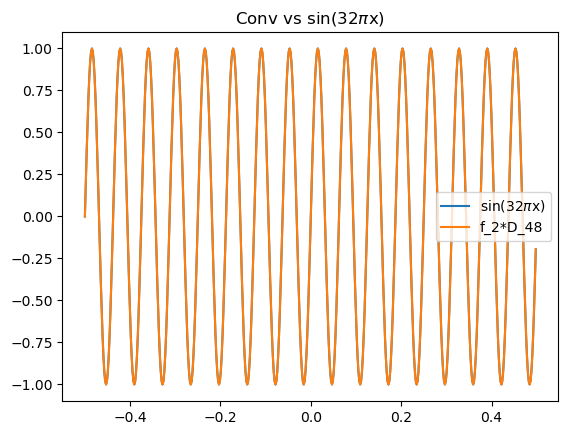

In [7]:
N = 512
start = -0.5

f, c_f = transform(f_2, N, start)
D_n, c_Dn = transform(D_48, N, start)
x = np.linspace(start, start+1, N, endpoint = False)
conv = convolve(f, D_n)

plt.plot(x, np.sin(32*np.pi *x), label =r"sin(32$\pi$x)")
plt.plot(x, conv/N, label ="f_2*D_48")
plt.title(r"Conv vs sin(32$\pi$x)")
plt.legend()
plt.show()


As expected the functions match supporting the claim that higher frequencies are removed. 

### e)


First we load the data, and get an overview of the structure.

In [8]:
def D_92(x):
    return D(92, x)

#load the data into a pandas dataframe
data = pd.read_csv("project1-data\project1-data\project1-1e-data.csv")

#get an overview of the structure of the data
print(data.head())
print(len(data))

          x    signal
0  0.000000  0.000000
1  0.000489  0.000061
2  0.000977  0.000244
3  0.001466  0.000550
4  0.001954  0.000978
2048


Now we will convolve the signal with the given kernels and plot the signal and bot convolutions.

In [9]:
N = len(data)
x = data['x']
signal = data['signal']

D_n = D_92(x)
#define h
h = np.zeros(N)
h[0] = -1 
h[1] = 2 
h[2] = -1

#Make convlolutions with D_92 and h
D_conv = convolve(signal, D_n)
h_conv = convolve(signal, h)

#Plot the signal and the two convolutions
plt.plot(x, signal, label="signal")
plt.plot(x, D_conv/N, label="signal*D_92/N") #Divide by N to scale the function
plt.plot(x, h_conv, label = "signal*h")
plt.title("Signal and convolutions")
plt.legend()
plt.show()

From the plot we can see that the dirichlet kernel scales the signal by N, and that the constant parts of the signal become varying like some combination of sinusoidal functions. The kernel h seems to pick out points in the signal where the amplitude changes rapidly. 

### f)

To get a filter that does the opposite of Dirichlet we can just use the same expression, but insted of having the sum from 0 to n we can do a sum from n or n+1 to N. Where N is the sampling frequency of $\hat{f}$. In other words we could use $K_n = 2\sum_{k=n}^{N-1} cos(2\pi kx), \quad n \in \mathbb{N}, n < N$ as the filter. Alternatively from k = n+1 depending on whether we want the n'th frequency or not. Working directly in the frequency domain this would mean elementwise multiplication with $(k_0,k_1, \dots, k_{N-1})$ with $k_j = \begin{cases}
  1 & \text{if } k \geq n (k>n) \\
  0 & \text{otherwise}
\end{cases}$

### g)

To get a filter that only allows certain frequencies in an interval, for example 40 to 64, we can follow the same logic as above. In the frequency domain use elementwise multiplication between the fourier coefficients of the signal and $(k_0,k_1, \dots, k_{N-1})$ with $k_j = \begin{cases}
  1 & \text{if } 40 \leq k \leq 64 \\
  0 & \text{otherwise}
\end{cases}$

In the time domain this would be the same as taking the convolution between the signal and $K_n = 2\sum_{k=40}^{64} cos(2\pi kx)$.

## 3 Image Processing

### a)
For these calculations $k_1$ and every sum over $j_1$ will be from 0 to $N_1-1$, $k_2$ and every sum over $j_2$ will be from 0 to $N_2-1$

$\hat{F}_{k_1,k_2} = \sum_{j_1} \sum_{j_2} F_{j_1,j_2} e^{-2\pi i (j_1k_1/N_1+j_2k_2/N_2)} = \sum_{j_2} (e^{-2\pi i j_2k_2/N_2 } \sum_{j_1} F_{j_1,j_2} e^{-2\pi i j_1k_1/N_1 })$

Now we let $y(k_1, j_2) = \sum_{j_1} F_{j_1,j_2} e^{-2\pi i j_1k_1/N_1 }$ for a fixed $j_2$ calculating $y(k_1, j_2)$ for every $k_1$ is the same as calculating a 1D FFT with $N_1$ elements, meaning it takes $O(N_1log(N_1))$ computations. Then doing this for all $j_2$ we get $O(N_2N_1log(N_1))$ computations, for computing every $y(k_1,j_2)$. Now we have:

$\hat{F}_{k_1,k_2} = \sum_{j_2} y(k_1, j_2) e^{-2\pi i j_2k_2/N_2 } $

Similar to before, if we fix $k_1$ then calculating $\hat{F}_{k_1,k_2}$ for every $k_2$ is the same as calculating a 1D FFT with $N_2$ elements, since we already calculated every $y(k_1,j_2)$, i.e. $O(N_2log(N_2))$ computations. Doing this for every $k_1$ yields $O(N_1N_2log(N_2))$ computations. 

This means in total we have the computational complexity:

$O(N_1N_2log(N_1)) + O(N_1N_2log(N_2)) = O(N_1N_2log(N_1N_2)) \quad \square$



### b)
The code below defines the functions given in the task, and plot both the functions and the absolute value of their fourier coefficients as grey-scale images.This is just to get used to the multivariate case. 

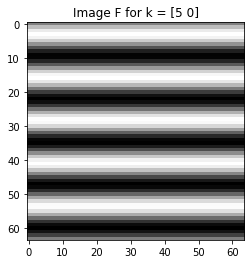

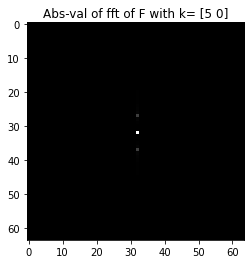

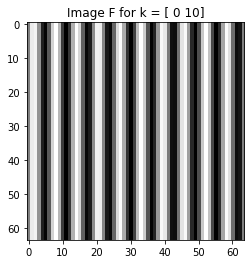

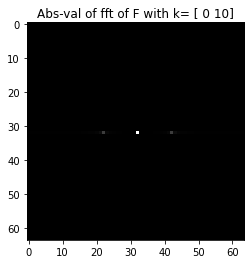

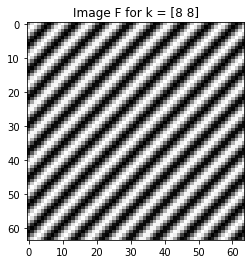

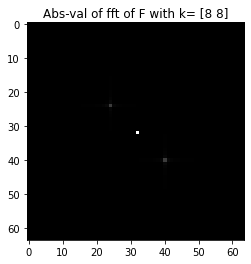

In [10]:
def f_2D(k, N):
    """
    inputs:
        N1: number of evaluation points in x direction
        N2: number of evaluation points in y direction
        k: vector defined in the task
    return:
        2D ndarray of function evaluations of function from the task for given k 
    """
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    xx, yy = np.meshgrid(x,y)
    
    return 1 + 1/2 * np.sin(2*np.pi * (xx.T * k[0] + yy.T * k[1]))

N = 64
k_list = [np.array([5,0]), np.array([0,10]), np.array([8,8])]

for k in k_list:
    #Plot the image F
    F_2D = f_2D(k, N)
    plt.figure()
    plt.title(f"Image F for k = {k}")
    plt.imshow(F_2D, cmap = "gray")
    
    #Plot absolute value of discrete fourier transform
    F_fourier_abs = abs(fft.fftshift(fft.fft2(F_2D)))
    plt.figure()
    plt.title(f"Abs-val of fft of F with k= {k}")
    plt.imshow(F_fourier_abs, cmap = "gray")

### c)
First lets load in the images and plot them to see how they look.

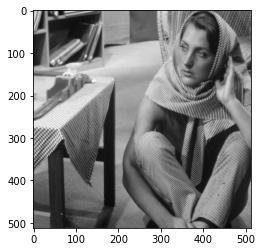

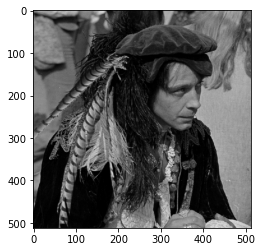

In [11]:

barbara = Image.open('project1-data\project1-data\\barbara.gif')
klaus = Image.open('project1-data\project1-data\\klaus.gif')

barbara_array = np.array(barbara)
klaus_array = np.array(klaus)

plt.imshow(barbara, cmap = "gray")
plt.show()
plt.imshow(klaus, cmap = "gray")
plt.show()

In the code blocks below we make a convolution function for the 2D case. Then we plot the real part of the convolution between the different filters given in the task and the two images to see how they look. 

In [12]:
def convolve_2D(f, g):
    """
    inputs:
        f,g: 2D ndarrays to concolve, g will be padded to the size of f if smaller
    return:
        2D ndarray of the convolution of f and padded g
    """
    #pad g with zeros, to the same size as f
    padded_g = np.pad(g, ((0, max(np.shape(f)[0] - np.shape(g)[0], 0 )), (0, max(np.shape(f)[1] - np.shape(g)[1], 0))), constant_values = 0, mode = "constant")
    
    return fft.ifft2( fft.fft2(f) * fft.fft2(padded_g) )

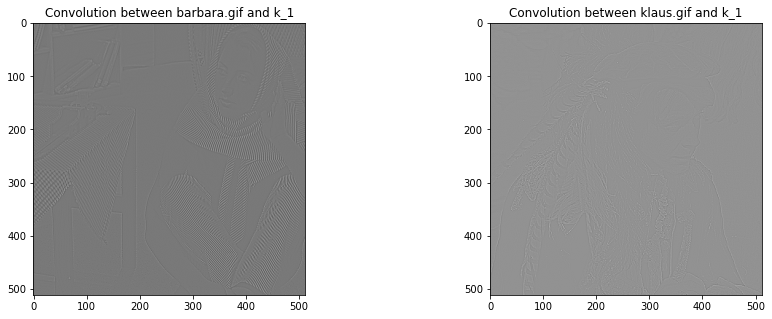

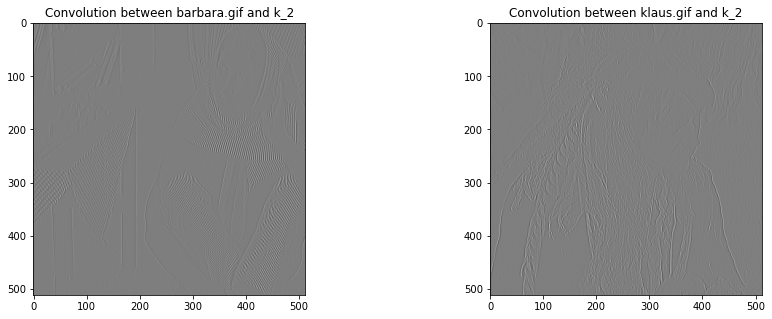

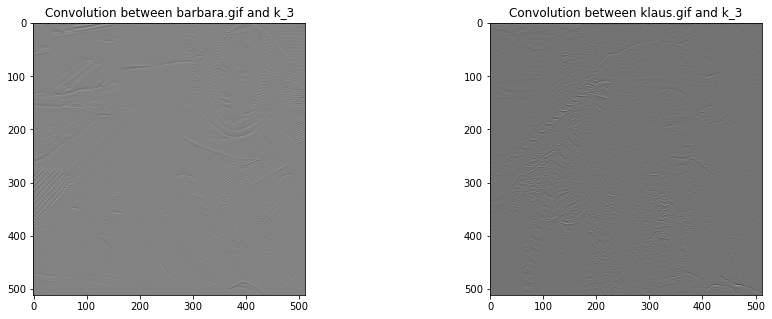

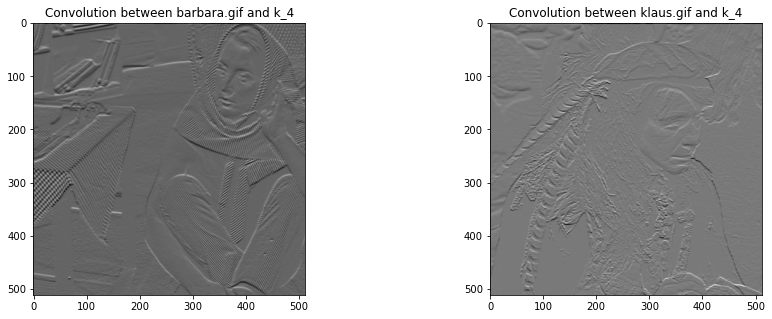

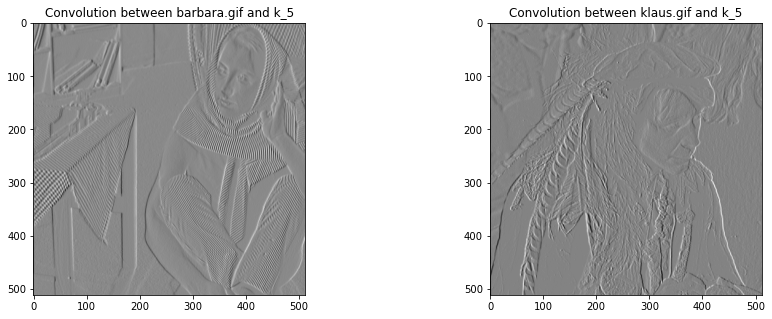

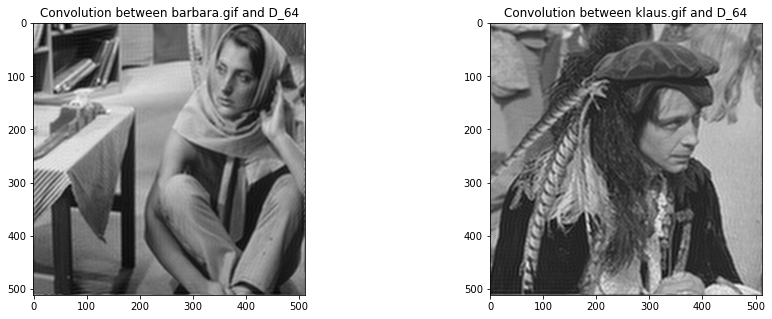

In [13]:
x = np.linspace(-0.5, 0.5, klaus_array.shape[0])
y = np.linspace(-0.5, 0.5, klaus_array.shape[1])

xx, yy = np.meshgrid(x,y)

#Define our filters
D_64_2D = D(64, xx) * D(64, yy)

k_1 = np.array([[0 ,-1 ,0 ], [-1 , 4, -1], [0 ,-1 ,0 ]])
k_2 = np.array([[-1 ,2 ,-1 ], [-1 ,2 ,-1 ], [-1 ,2 ,-1 ]])
k_3 = np.array([[-1 ,-1 ,-1 ], [2 ,2 ,2 ], [-1 ,-1 ,-1 ]])
k_4 = np.array([[1 ,2 ,1 ], [0 ,0 ,0 ], [-1 ,-2 ,-1 ]])
k_5 = np.array([[1,  0 ,-1 ], [2 ,0 ,-2 ], [1 ,0 ,-1 ]])
filters = [k_1, k_2, k_3, k_4, k_5]


#Plot the convolutions between the image and the filters
for i in range(len(filters)):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].set_title(fr"Convolution between barbara.gif and k_{i+1}")    
    axs[0].imshow( convolve_2D(barbara_array, filters[i]).real ,cmap = "gray")
    axs[1].set_title(fr"Convolution between klaus.gif and k_{i+1}")    
    axs[1].imshow( convolve_2D(klaus_array, filters[i]).real , cmap = "gray")

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].set_title(fr"Convolution between barbara.gif and D_{64}")    
axs[0].imshow(fft.ifftshift(convolve_2D(barbara_array, D_64_2D)).real, cmap = "gray" )
axs[1].set_title(fr"Convolution between klaus.gif and D_{64}")    
axs[1].imshow( fft.ifftshift(convolve_2D(klaus_array, D_64_2D)).real, cmap = "gray" )

$k_1$ filters out pixels that similar to their direct vertical and horisontal neighbors, meaning we are left with the pixels that are different from their direct neighbors in both directions. $k_2$ shows contrasts in the horisontal direction. Filter 3 does the same but in the vertical direction.

### d) 
First lets load the image, and see what it looks like, and get the dimensions.

(914, 1264)


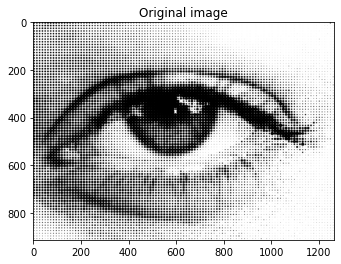

In [14]:
yarimton = Image.open('project1-data\project1-data\\Yarimton-dithered.png')

yarimton_array = np.invert(np.array(yarimton))
print(np.shape(yarimton_array))

plt.figure()
plt.title("Original image")
plt.imshow(yarimton, cmap = 'gray')
plt.show()



Now we will plot the logarithm of the amplitude of the image, and try to get rid of the dot artefacts using the dirichlet kernel. 

(914, 1264)


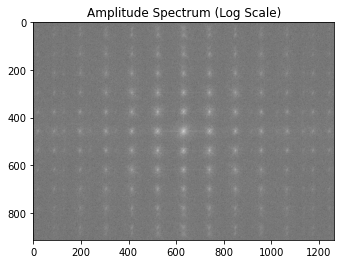

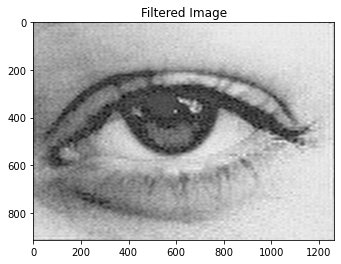

In [15]:
im_fft = fft.fftshift(fft.fft2(yarimton))

print(np.shape(im_fft))

x = np.linspace(-0.5, 0.5, np.shape(im_fft)[1])
y = np.linspace(-0.5, 0.5, np.shape(im_fft)[0])
xx, yy = np.meshgrid(x, -y)

D_64_2D = D(64, xx) * D(64, yy)

# Display the original amplitude spectrum (log scale)
amp = np.log(abs(im_fft))
plt.imshow((amp), cmap="gray")
plt.title("Amplitude Spectrum (Log Scale)")

filtered_image = convolve_2D(yarimton_array, D_64_2D)

# Display the filtered image
plt.figure()
plt.imshow(abs(fft.fftshift(filtered_image)), cmap="gray")
plt.title("Filtered Image")

plt.show()

We can see that the image becomes blurry, but the dots/half-toning effects disappears. After some testing we found that $D_{64}$ works quite well. Bellow we will do the same for the lighthouse and munkholmen image, but using $D_{100}$ as we found this works well through testing. 

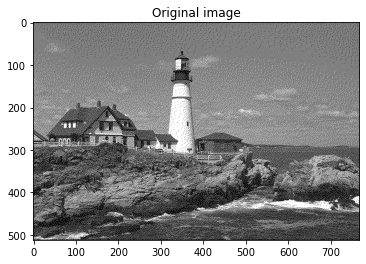

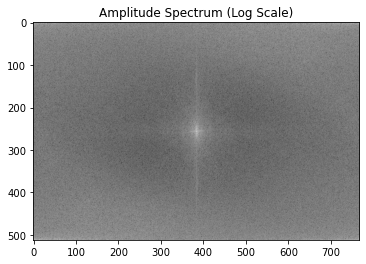

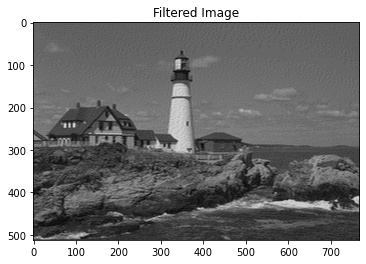

In [16]:
lighthouse = Image.open('project1-data\project1-data\\lighthouse-dithered.png')

lighthouse_array = (np.array(lighthouse))

plt.figure()
plt.title("Original image")
plt.imshow(lighthouse, cmap = 'gray')
plt.show()


im_fft = fft.fftshift(fft.fft2(lighthouse))

x = np.linspace(-0.5, 0.5, np.shape(im_fft)[1])
y = np.linspace(-0.5, 0.5, np.shape(im_fft)[0])
xx, yy = np.meshgrid(x, -y)

D_100_2D = D(100, xx) * D(100, yy)

# Display the original amplitude spectrum (log scale)
amp = np.log(abs(im_fft))
plt.imshow((amp), cmap="gray")
plt.title("Amplitude Spectrum (Log Scale)")

filtered_image = convolve_2D(lighthouse_array, D_100_2D)

# Display the filtered image
plt.figure()
plt.imshow(abs(fft.fftshift(filtered_image)), cmap="gray")
plt.title("Filtered Image")

plt.show()


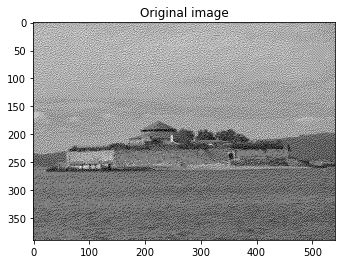

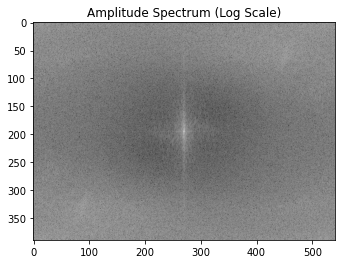

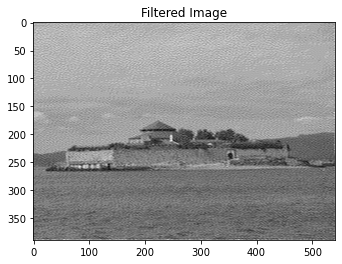

In [17]:
munkholmen = Image.open('project1-data\project1-data\\munkholmen-dithered.png')

munkholmen_array = (np.array(munkholmen))

plt.figure()
plt.title("Original image")
plt.imshow(munkholmen, cmap = 'gray')
plt.show()


im_fft = fft.fftshift(fft.fft2(munkholmen))

x = np.linspace(-0.5, 0.5, np.shape(im_fft)[1])
y = np.linspace(-0.5, 0.5, np.shape(im_fft)[0])
xx, yy = np.meshgrid(x, -y)

D_100_2D = D(100, xx) * D(100, yy)

# Display the original amplitude spectrum (log scale)
amp = np.log(abs(im_fft))
plt.imshow((amp), cmap="gray")
plt.title("Amplitude Spectrum (Log Scale)")

filtered_image = convolve_2D(munkholmen_array, D_100_2D)

# Display the filtered image
plt.figure()
plt.imshow(abs(fft.fftshift(filtered_image)), cmap="gray")
plt.title("Filtered Image")

plt.show()


In both cases we see that the half-toning effect is removed while not significantly decreasing the image quality. 